In [943]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [944]:
# Loading the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [945]:
# Selection of columns under consideration
data2=data[['RM','MEDV']]
data2=data2.rename(columns={'RM':'x', 'MEDV':'y'})
data3=data2

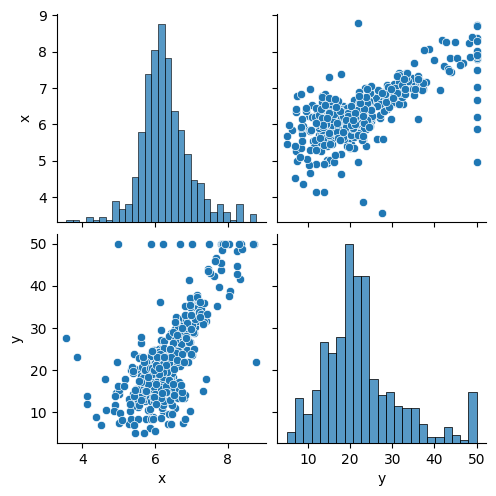

In [946]:
sns.pairplot(data2)

In [947]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
x=data2['x']
y=data2['y']
randomvalue= int(input("Enter the random number"))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=randomvalue)


In [948]:
data2=pd.DataFrame({'x':x_train.squeeze(),'y':y_train.squeeze()})
data3=pd.DataFrame({'x':x_test.squeeze(),'y':y_test.squeeze()})
data2.head()

,x,y
133,5.822,18.4
232,8.337,41.7
198,7.274,34.6
226,8.040,37.6
118,5.872,20.4


In [949]:
data3.head()

,x,y
362,5.362,20.8
261,7.520,43.1
235,6.086,24.0
432,6.425,16.1
501,6.593,22.4


<!-- Finding the required values for operation -->

In [950]:
# Table value generation for linear and quadratic regression
data2['x2']=data2['x']*data2['x']
data2['x3']=data2['x']*data2['x2']
data2['x4']=data2['x']*data2['x3']
data2['xy']=data2['x']*data2['y']
data2['x2y']=data2['x2']*data2['y']

In [951]:
# Table of value generation for exponential regression
data2['Y']=data2['y'].apply(np.log)
data2['X']=data2['x'].apply(np.log)
data2['XY']=data2['Y']*data2['X']
data2['X2']=data2['X']*data2['X']
data2['xY']=data2['x']*data2['Y']


In [952]:
# Finding summation value and n value
sumx=data2['x'].sum()
sumx2=data2['x2'].sum()
sumx3=data2['x3'].sum()
sumx4=data2['x4'].sum()
sumy=data2['y'].sum()
sumxy=data2['xy'].sum()
sumx2y=data2['x2y'].sum()
sumX=data2['X'].sum()
sumY=data2['Y'].sum()
sumXY=data2['XY'].sum()
sumX2=data2['X2'].sum()
sumxY=data2['xY'].sum()
n=data2['x'].count()

In [953]:
n

404

In [954]:
data2.head()

,x,y,x2,x3,x4,xy,x2y,Y,X,XY,X2,xY
133,5.822,18.4,33.895684,197.340672,1148.917394,107.1248,623.680586,2.912351,1.761644,5.130525,3.103389,16.955706
232,8.337,41.7,69.505569,579.467929,4831.024122,347.6529,2898.382227,3.730501,2.120703,7.911287,4.497383,31.101188
198,7.274,34.6,52.911076,384.875167,2799.581963,251.6804,1830.723230,3.543854,1.984306,7.032091,3.937472,25.777992
226,8.040,37.6,64.641600,519.718464,4178.536451,302.3040,2430.524160,3.627004,2.084429,7.560233,4.344845,29.161113
118,5.872,20.4,34.480384,202.468815,1188.896881,119.7888,703.399834,3.015535,1.770195,5.338086,3.133591,17.707221


In [955]:
print(sumx,sumy,sumx2,sumx3,sumx4,sumxy,sumx2y)

2538.837 9106.1 16168.288337000002 104340.68703995101 682499.2700261606 59126.9844 389779.8681222


In [956]:
# Finding cofficient of the the quadratic function 
A=np.array([[sumx2,sumx,n],[sumx3,sumx2,sumx],[sumx4,sumx3,sumx2]])
B=np.array([sumy,sumxy,sumx2y])

coff=np.linalg.solve(A,B)
coff

array([  2.4057822 , -21.90116123,  63.89157963])

In [957]:
# Finding the cofficient of linear function
A2=np.array([[sumx,n],[sumx2,sumx]])
B2=np.array([sumy,sumxy])
coff2=np.linalg.solve(A2,B2)
coff2

array([  8.90429954, -33.41699288])

In [958]:
# Finding the cofficient of linearly transformed power functions
A2=np.array([[n,sumX],[sumX,sumX2]])
B2=np.array([sumY,sumXY])
coff3=np.linalg.solve(A2,B2)
coff3
ap=np.exp(coff3[0])
bp=coff3[1]



In [959]:
# Finding the cofficient of linearly transformed exponential function
A2=np.array([[n,sumx],[sumx,sumx2]])
B2=np.array([sumY,sumxY])
coff4=np.linalg.solve(A2,B2)
coff4
ae=np.exp(coff4[0])
be=np.exp(coff4[1])


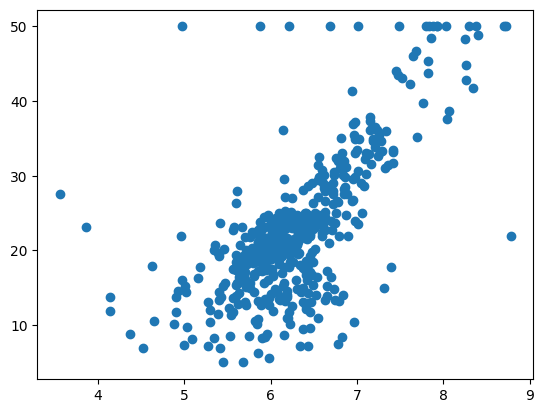

In [960]:
plt.scatter(data['RM'],data['MEDV'])


In [961]:
# Predicted Quadratic Function
def soln(x):
    y=coff[0]*(x**2)+coff[1]*x+coff[2]
    return y



In [962]:
#Predicted Linear Function
def soln2(x):
    y=coff2[0]*x+coff2[1]
    return y

In [963]:
#Predicted Power Function
def soln3(x):
    y=ap*(x**bp)
    return y


In [964]:
#Predicted Exponential Function
def soln4(x):
    y=ae*(be**x)
    return y


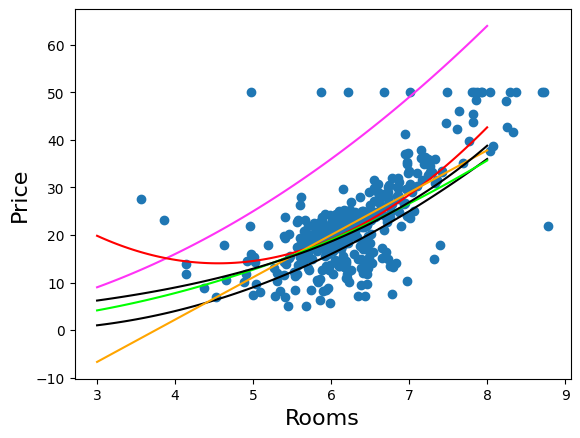

In [965]:

array=np.linspace(3,8,100)
plt.xlabel("Rooms",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.scatter(data2['x'],data2['y'])
plt.plot(array,np.vectorize(lambda x:((x)**2)/1)(array),'#FF33F6')
plt.plot(array,np.vectorize(lambda x:((x-2)**2)/1)(array),'black')
plt.plot(array,np.vectorize(soln)(array),'red')
plt.plot(array,np.vectorize(soln2)(array),'orange')
plt.plot(array,np.vectorize(soln3)(array),'lime')
plt.plot(array,np.vectorize(soln4)(array),'black')

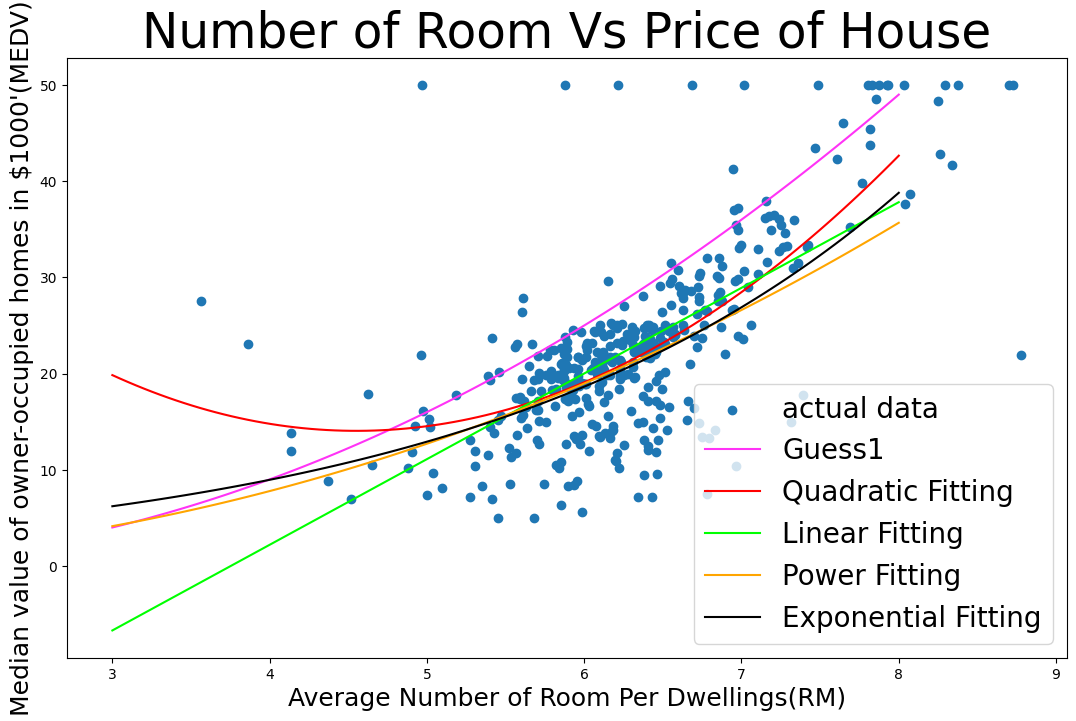

In [966]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=18)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=18)
ax.set_title("Number of Room Vs Price of House",fontsize=35)
ax.scatter(data2['x'],data2['y'],label="actual data")
ax.plot(array,np.vectorize(lambda x:((x-1)**2))(array),'#FF33F6',label="Guess1")
ax.plot(array,np.vectorize(soln)(array),'r',label="Quadratic Fitting")
ax.plot(array,np.vectorize(soln2)(array),'lime',label="Linear Fitting")
ax.plot(array,np.vectorize(soln3)(array),'orange',label="Power Fitting")
ax.plot(array,np.vectorize(soln4)(array),'black',label="Exponential Fitting")
ax.legend(loc=4,fontsize=20)

In [967]:
data3['ylin']=data3['x'].apply(soln2)
data3['yquad']=data3['x'].apply(soln)
data3['ypow']=data3['x'].apply(soln3)
data3['yexp']=data3['x'].apply(soln4)
data3['errorlin']=data3['y']-data3['ylin']
data3['errorquad']=data3['y']-data3['yquad']
data3['errorpow']=data3['y']-data3['ypow']
data3['errorexp']=data3['y']-data3['yexp']
data3.head()

,x,y,ylin,yquad,ypow,yexp,errorlin,errorquad,errorpow,errorexp
362,5.362,20.8,14.327861,15.626303,14.816475,14.753899,6.472139,5.173697,5.983525,6.046101
261,7.520,43.1,33.543340,35.242793,31.143326,32.536978,9.556660,7.857207,11.956674,10.563022
235,6.086,24.0,20.774574,19.709832,19.568337,19.237104,3.225426,4.290168,4.431663,4.762896
432,6.425,16.1,23.793132,22.488812,22.042354,21.781883,-7.693132,-6.388812,-5.942354,-5.681883
501,6.593,22.4,25.289054,24.070920,23.328060,23.165120,-2.889054,-1.670920,-0.928060,-0.765120


In [968]:
ymean=data3['y'].mean()

In [969]:
# Calculating accuracy of linear modeling
rsmelin=np.sqrt(((data3['errorlin']**2).sum())/data3['x'].count())
accuracylin=(1-(rsmelin/ymean))*100
accuracylin=round(accuracylin,4)


In [970]:
# Calculating the accuracy of quadratic modeling
rsmequad=np.sqrt(((data3['errorquad']**2).sum())/data3['x'].count())
accuracyquad=(1-(rsmequad/ymean))*100
accuracyquad=round(accuracyquad,4)

In [971]:
# Calculating the accuracy of power modeling of type (a*x^b)
rsmepow=np.sqrt(((data3['errorpow']**2).sum())/data3['x'].count())
accuracypow=(1-(rsmepow/ymean))*100
accuracypow=round(accuracypow,4)

In [972]:
# Calculating the accuracy of power modeling of type (a*x^b)
rsmeexp=np.sqrt(((data3['errorexp']**2).sum())/data3['x'].count())
accuracyexp=(1-(rsmeexp/ymean))*100
accuracyexp=round(accuracyexp,4)

Text(0.5, 1.0, 'Box Plots of Regression Predictions')

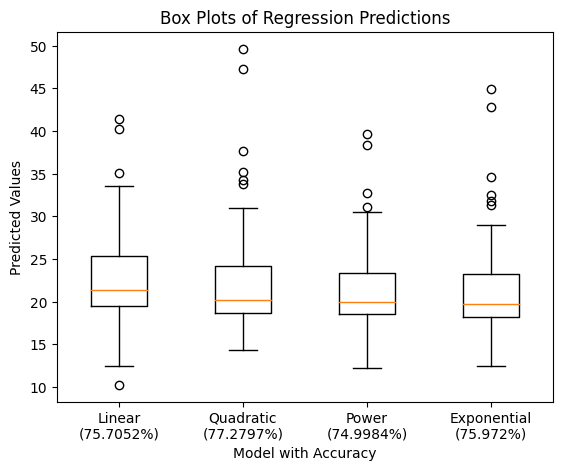

In [973]:
# Combine the predictions into a list
all_predictions = [data3['ylin'], data3['yquad'],data3['ypow'],data3['yexp']]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(all_predictions)

# Set x-axis tick labels
ax.set_xlabel("Model with Accuracy")
ax.set_xticklabels([f'Linear\n({accuracylin}%)', f'Quadratic\n({accuracyquad}%)', f'Power\n({accuracypow}%)', f'Exponential\n({accuracyexp}%)'])

# Set y-axis label
ax.set_ylabel('Predicted Values')

# Set plot title
ax.set_title('Box Plots of Regression Predictions')

# Show the plot


In [974]:
plt.show()

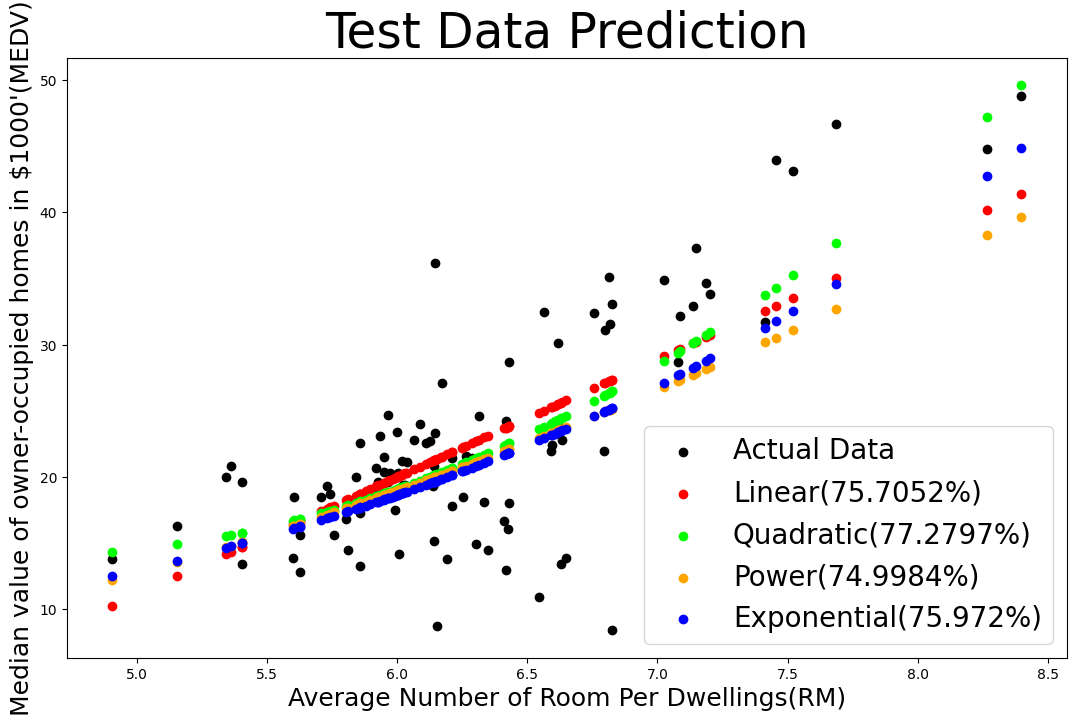

In [975]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=18)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=18)
ax.set_title("Test Data Prediction",fontsize=35)
ax.scatter(data3['x'],data3['y'],color='black',label="Actual Data")
ax.scatter(data3['x'],data3['ylin'],color='red',label=f"Linear({accuracylin}%)")
ax.scatter(data3['x'],data3['yquad'],color="lime",label=f"Quadratic({accuracyquad}%)")
ax.scatter(data3['x'],data3['ypow'],color='orange',label=f"Power({accuracypow}%)")
ax.scatter(data3['x'],data3['yexp'],color='blue',label=f"Exponential({accuracyexp}%)")
ax.legend(loc=4,fontsize=20)
plt.show()